# Principal Component Analysis with Cancer Data

In [250]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [251]:
breast_cancer_df = pd.read_csv("breast-cancer-wisconsin-data.csv")
breast_cancer_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [252]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [253]:
breast_cancer_df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [254]:
breast_cancer_df.shape

(699, 11)

In [255]:
#As Bare Nuclei datatype is object so we need to convert it to int type.

In [256]:
#breast_cancer_df["Bare Nuclei"]= breast_cancer_df["Bare Nuclei"].astype(int)
## As there is a question mark in the data set ,thatswhy this typeconversion gave the error.

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [257]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [258]:
breast_cancer_df.isnull().count()

ID                             699
ClumpThickness                 699
Cell Size                      699
Cell Shape                     699
Marginal Adhesion              699
Single Epithelial Cell Size    699
Bare Nuclei                    699
Normal Nucleoli                699
Bland Chromatin                699
Mitoses                        699
Class                          699
dtype: int64

In [259]:
#there is no null value,good to proceed.

In [260]:
# No missing values found. So let us try to remove ? from bare nuclei column
len(breast_cancer_df[breast_cancer_df["Bare Nuclei"]== "?"])
# Get count of rows having ?


16

In [261]:
breast_cancer_df.duplicated().sum()
#Now the duplicated values are dropped.

8

In [262]:
#breast_cancer_df.replace(to_replace="?",value = breast_cancer_df.describe(include ='all')["Bare Nuclei"]['top'], inplace = True)

In [263]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
breast_cancer_df.replace(to_replace="?",value=np.nan,inplace=True)

In [264]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    683 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [265]:
breast_cancer_df.replace(to_replace=np.nan,value=breast_cancer_df.describe(include ='all')["Bare Nuclei"]['top'],inplace=True)

In [266]:
#i have replaced the Bare Nuclei "?" with the most frequent value that is 1 here, as the occurance of 1 is more than 400 outof 699 values.

In [267]:
#check for duplicate values
breast_cancer_df.duplicated().sum()

9

In [268]:
breast_cancer_df.drop_duplicates(inplace=True)
#removed the duplicated rows

In [269]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 698
Data columns (total 11 columns):
ID                             690 non-null int64
ClumpThickness                 690 non-null int64
Cell Size                      690 non-null int64
Cell Shape                     690 non-null int64
Marginal Adhesion              690 non-null int64
Single Epithelial Cell Size    690 non-null int64
Bare Nuclei                    690 non-null object
Normal Nucleoli                690 non-null int64
Bland Chromatin                690 non-null int64
Mitoses                        690 non-null int64
Class                          690 non-null int64
dtypes: int64(10), object(1)
memory usage: 64.7+ KB


In [270]:
breast_cancer_df["Bare Nuclei"]= breast_cancer_df["Bare Nuclei"].astype(int)

In [271]:
breast_cancer_df.drop("ID",axis =1,inplace=True)

In [272]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 690 non-null int64
Cell Size                      690 non-null int64
Cell Shape                     690 non-null int64
Marginal Adhesion              690 non-null int64
Single Epithelial Cell Size    690 non-null int64
Bare Nuclei                    690 non-null int32
Normal Nucleoli                690 non-null int64
Bland Chromatin                690 non-null int64
Mitoses                        690 non-null int64
Class                          690 non-null int64
dtypes: int32(1), int64(9)
memory usage: 56.6 KB


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [273]:
# Check for correlation of variable

In [274]:
breast_cancer_df.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947
Class,0.716812,0.817586,0.817551,0.701175,0.681063,0.816655,0.756736,0.715363,0.423947,1.000000


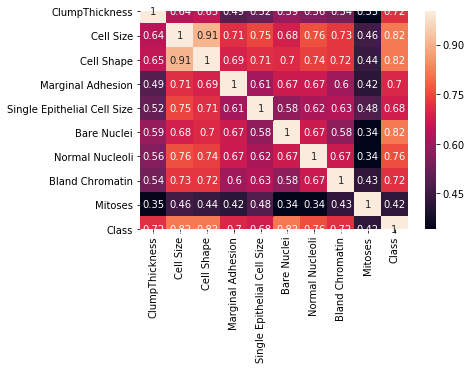

In [275]:
sns.heatmap(breast_cancer_df.corr(), annot=True)

In [276]:
#There seems to be a strong corelation between cell size and cell shape and between also in general corelation looks strong only as the values are more than 0.75 for almost all.

In [277]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\Users\abir_kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\abir_kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


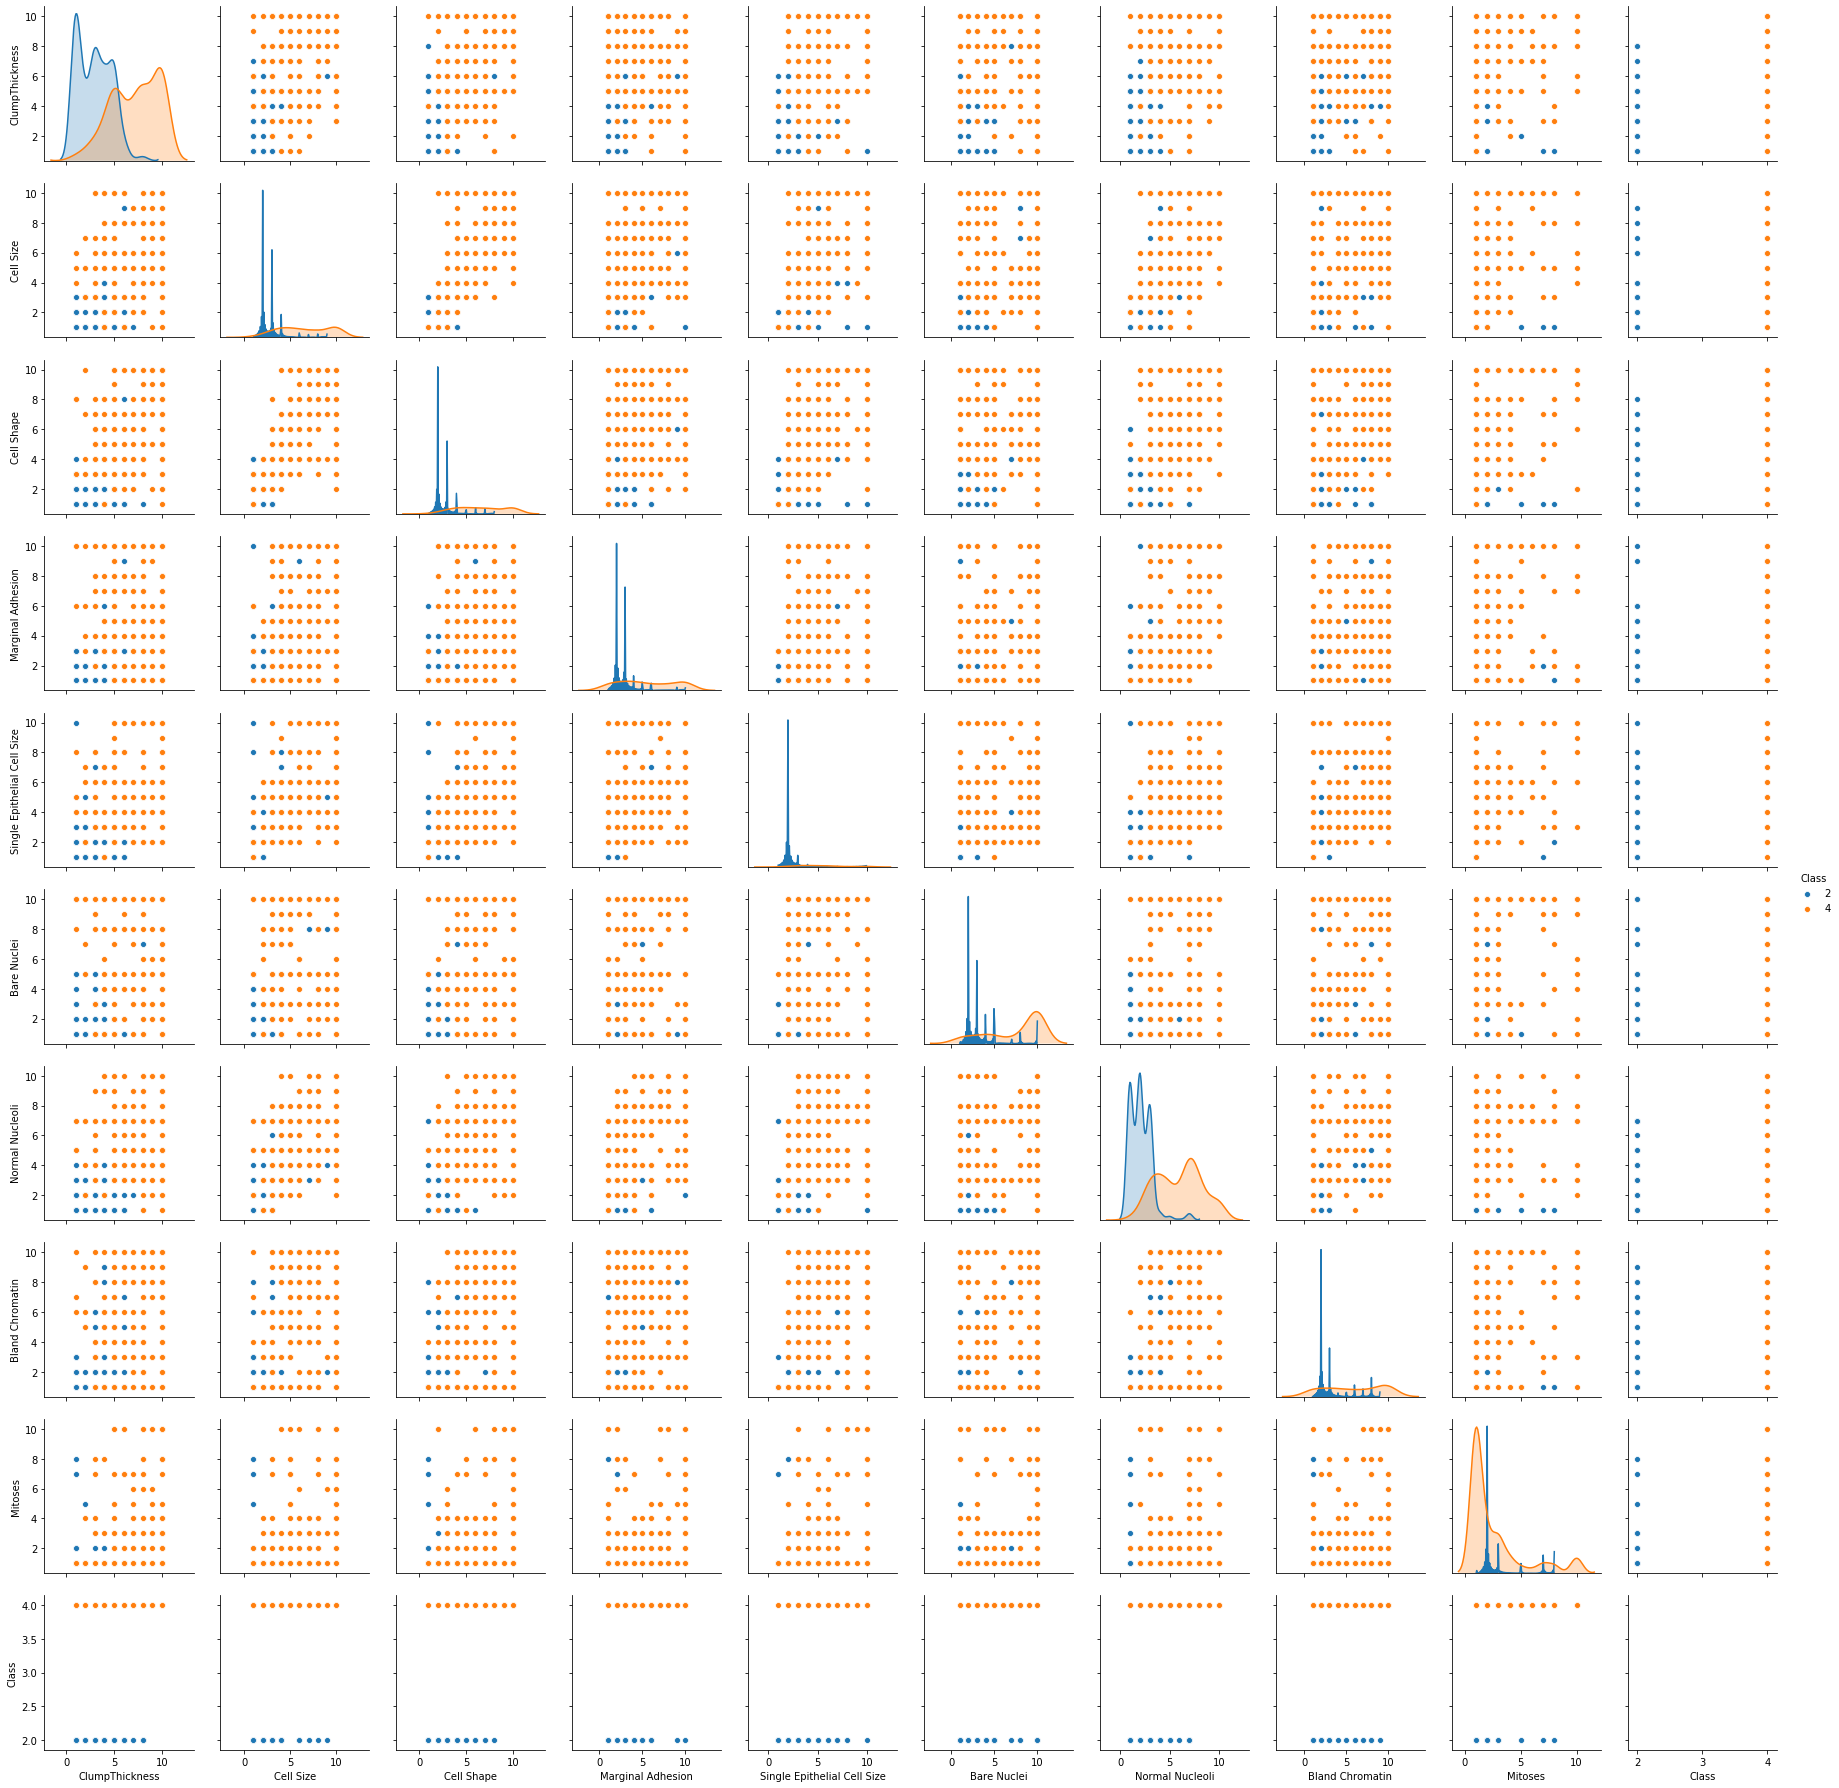

In [278]:
#Let us check for pair plots
sns.pairplot(breast_cancer_df,hue="Class",diag_kind='kde')

In [279]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

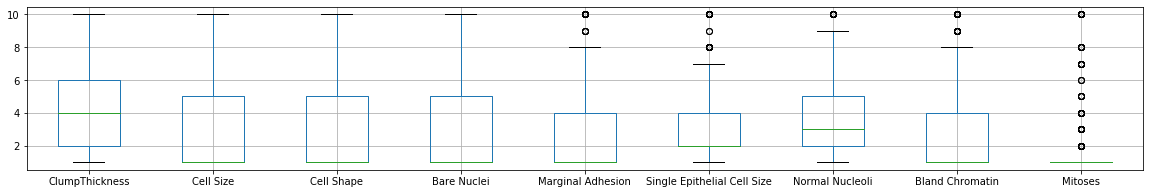

In [280]:
# We could see most of the outliers are now removed.
#by = 'group',layout=(2,4), figsize=(30, 15)
breast_cancer_df.boxplot( figsize=(20, 3),column=["ClumpThickness","Cell Size","Cell Shape","Bare Nuclei","Marginal Adhesion","Single Epithelial Cell Size","Normal Nucleoli","Bland Chromatin","Mitoses"])


In [281]:
pd.crosstab(breast_cancer_df["Bare Nuclei"], breast_cancer_df["Class"])

Class,2,4
Bare Nuclei,,
1,395,17
2,21,9
3,14,14
4,6,13
5,10,20
6,0,4
7,1,7
8,2,18
9,0,9


In [282]:
pd.crosstab(breast_cancer_df["Single Epithelial Cell Size"], breast_cancer_df["Class"])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [283]:
pd.crosstab(breast_cancer_df["Bland Chromatin"], breast_cancer_df["Class"])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [284]:
pd.crosstab(breast_cancer_df["Normal Nucleoli"], breast_cancer_df["Class"])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [285]:
#Mitoses
pd.crosstab(breast_cancer_df["Mitoses"], breast_cancer_df["Class"])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [286]:
##log transformation
breast_cancer_df["Marginal Adhesion"]=np.where(breast_cancer_df["Marginal Adhesion"]>4,4,breast_cancer_df["Marginal Adhesion"])


In [287]:
breast_cancer_df["Single Epithelial Cell Size"]= np.where(breast_cancer_df["Single Epithelial Cell Size"]>4,4,breast_cancer_df["Single Epithelial Cell Size"])


In [288]:
breast_cancer_df["Bland Chromatin"]= np.where(breast_cancer_df["Bland Chromatin"]>4,4,breast_cancer_df["Bland Chromatin"])


In [289]:
breast_cancer_df["Normal Nucleoli"]= np.where(breast_cancer_df["Normal Nucleoli"]>4,4,breast_cancer_df["Normal Nucleoli"])


In [290]:
breast_cancer_df["Mitoses"]= np.where(breast_cancer_df["Mitoses"]>3,3,breast_cancer_df["Mitoses"])

In [291]:
breast_cancer_df.drop("Class",axis=1,inplace=True)

# Q6 Create a covariance matrix for identifying Principal components

In [292]:
# PCA
# Step 1 - Create covariance matrix


In [293]:
cov_matrix = np.cov(breast_cancer_df.T)
cov_matrix

array([[ 7.93762016,  5.51311079,  5.45212343,  2.02134999,  1.58362256,
         6.01908248,  1.74823416,  2.10597589,  0.808296  ],
       [ 5.51311079,  9.25650701,  8.15558781,  2.84857281,  2.26463474,
         7.53352685,  2.31165941,  2.88911466,  1.04344461],
       [ 5.45212343,  8.15558781,  8.76659936,  2.70385562,  2.13964788,
         7.54129488,  2.21436865,  2.78168739,  0.95720957],
       [ 2.02134999,  2.84857281,  2.70385562,  1.68629183,  0.86946005,
         3.26875749,  0.8906628 ,  1.10828548,  0.37018573],
       [ 1.58362256,  2.26463474,  2.13964788,  0.86946005,  0.92942933,
         2.3775478 ,  0.69569424,  0.91140279,  0.30098231],
       [ 6.01908248,  7.53352685,  7.54129488,  3.26875749,  2.3775478 ,
        13.08315139,  2.63730044,  3.03232158,  1.09873793],
       [ 1.74823416,  2.31165941,  2.21436865,  0.8906628 ,  0.69569424,
         2.63730044,  1.2920658 ,  0.97184325,  0.28945331],
       [ 2.10597589,  2.88911466,  2.78168739,  1.10828548,  0

# Q7 Identify eigen values and eigen vector

In [294]:
# Step 2- Get eigen values and eigen vector

In [295]:
eigenvalues, eigenvectors= np.linalg.eig(cov_matrix)
print(eigenvectors)

[[-0.37793473 -0.30611856 -0.87149609  0.02921345  0.0464969  -0.02655505
   0.00521984  0.0138835   0.00328177]
 [-0.48030319 -0.37138518  0.36310596 -0.28882679  0.62320364 -0.07225748
   0.08611079 -0.12256494  0.00859602]
 [-0.4701964  -0.31581553  0.3131778   0.62831967 -0.42331117  0.03903094
   0.00183466  0.07091909 -0.02369219]
 [-0.1765067   0.0283257   0.05889019 -0.36351897 -0.16271091  0.03504038
   0.13686343  0.87521077 -0.14142414]
 [-0.13493925 -0.02071091  0.05000769 -0.20374445 -0.10945878 -0.05622205
  -0.95470159  0.03256983  0.09844709]
 [-0.54788287  0.81581236 -0.03892782  0.10897441  0.11760216 -0.02657761
   0.02467771 -0.06319784  0.04176316]
 [-0.14473832  0.00861879  0.01944337 -0.32408382 -0.31643625  0.1302813
   0.02519154 -0.36115694 -0.79081863]
 [-0.17603478 -0.03998695  0.05200715 -0.46946517 -0.52709861 -0.20866203
   0.24721    -0.27450959  0.5352284 ]
 [-0.062556   -0.01306532 -0.00113933 -0.09989459 -0.00342614  0.96277832
  -0.00334931 -0.054009

In [296]:
print(eigenvalues)

[33.74653551  4.3904899   3.55912082  0.94815975  0.78520871  0.30086455
  0.27299766  0.59686883  0.51501899]


# Q8 Find variance and cumulative variance by each eigen vector

In [297]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%


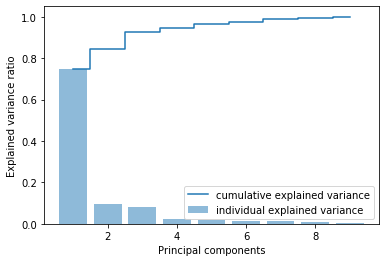

In [298]:
plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [299]:
from sklearn.decomposition import PCA

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [300]:
#Applying PCA
X=breast_cancer_df
pca=PCA(n_components=6)
X = pca.fit_transform(X)

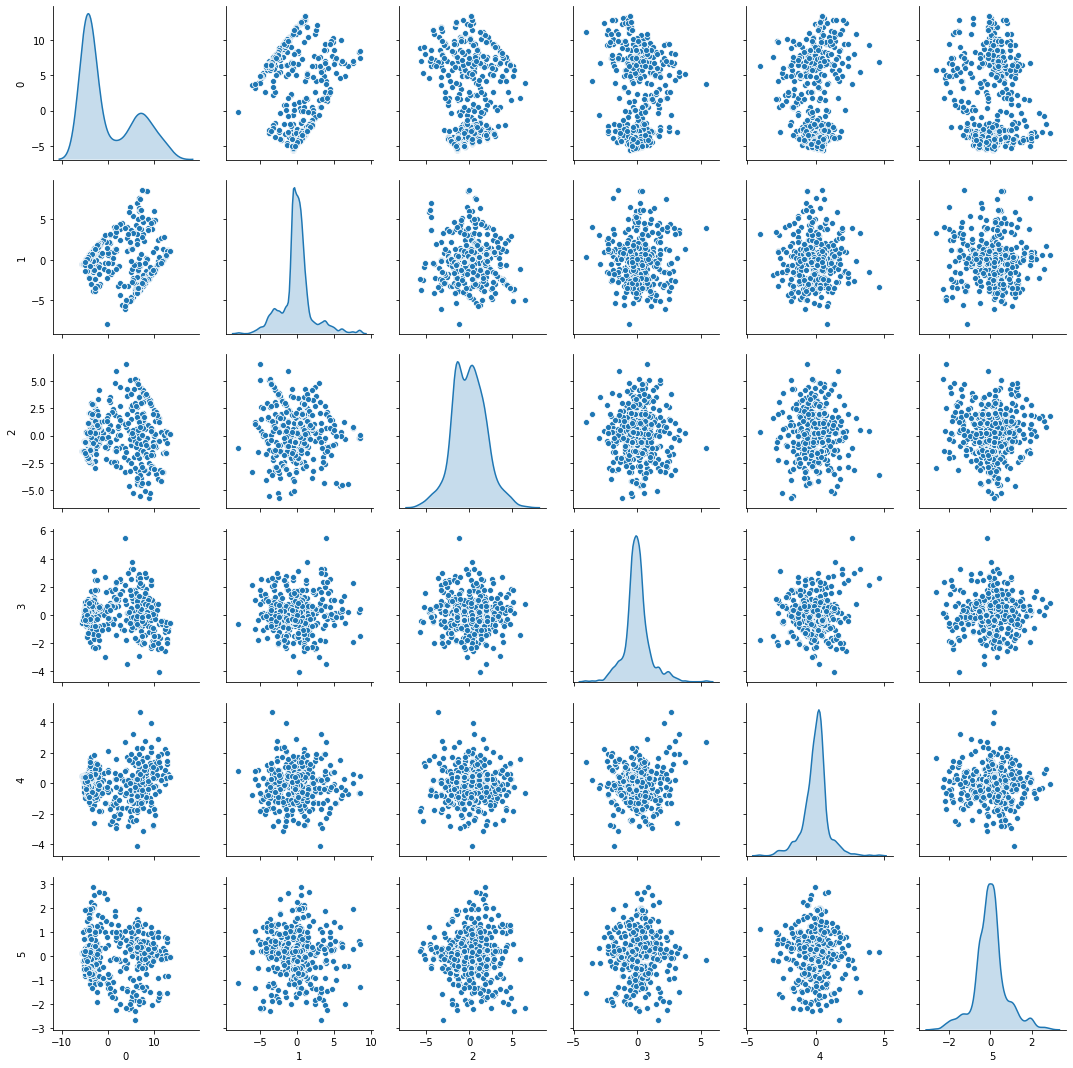

In [301]:
sns.pairplot(pd.DataFrame(X),diag_kind='kde')

# Q10 Find correlation between components and features

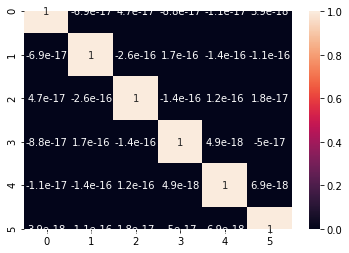

In [302]:
sns.heatmap(pd.DataFrame(X).corr(),annot=True)

In [303]:
pca.explained_variance_ratio_

array([0.74800704, 0.09731717, 0.0788895 , 0.02101638, 0.0174045 ,
       0.01322986])

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [304]:
jokes_df=pd.read_csv("jokes.csv")
jokes_df

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,100,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,91,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,39,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
24981,37,99.00,99.00,99.00,99.00,-9.71,99.00,4.56,-8.30,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [305]:
df_rating_matrix= jokes_df.loc[0:200,:]
df_rating_matrix.head(200)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,100,5.73,0.00,-0.58,1.75,2.86,7.23,2.04,-4.27,3.11,...,1.70,4.66,1.65,5.58,5.73,3.50,0.00,-2.04,2.91,1.84
196,71,1.80,5.39,8.06,-0.10,4.81,4.66,-7.09,-7.72,3.69,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
197,100,2.62,-3.79,-1.17,-0.44,-1.02,5.05,-3.69,2.18,3.30,...,1.41,-2.52,-0.53,-1.89,1.17,-2.04,-1.17,-0.73,0.73,0.44
198,43,99.00,99.00,99.00,99.00,7.91,99.00,3.64,-1.89,99.00,...,2.96,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [306]:
df_rating_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Columns: 101 entries, NumJokes to Joke100
dtypes: float64(100), int64(1)
memory usage: 158.7 KB


# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [307]:
df_rating_matrix.replace(to_replace=99,value=0,inplace=True)

C:\Users\abir_kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [308]:
df_rating_matrix

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,48,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,71,1.80,5.39,8.06,-0.10,4.81,4.66,-7.09,-7.72,3.69,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
197,100,2.62,-3.79,-1.17,-0.44,-1.02,5.05,-3.69,2.18,3.30,...,1.41,-2.52,-0.53,-1.89,1.17,-2.04,-1.17,-0.73,0.73,0.44
198,43,0.00,0.00,0.00,0.00,7.91,0.00,3.64,-1.89,0.00,...,2.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
199,71,5.58,-7.28,-4.56,2.67,7.38,2.18,2.14,2.23,5.58,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [309]:
df_rating_matrix.drop("NumJokes",axis =1,inplace=True)

C:\Users\abir_kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [310]:
df_rating_matrix

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1.80,5.39,8.06,-0.10,4.81,4.66,-7.09,-7.72,3.69,4.47,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
197,2.62,-3.79,-1.17,-0.44,-1.02,5.05,-3.69,2.18,3.30,-0.73,...,1.41,-2.52,-0.53,-1.89,1.17,-2.04,-1.17,-0.73,0.73,0.44
198,0.00,0.00,0.00,0.00,7.91,0.00,3.64,-1.89,0.00,0.00,...,2.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
199,5.58,-7.28,-4.56,2.67,7.38,2.18,2.14,2.23,5.58,-4.51,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [311]:
df_rating_matrix.mean().sort_values(ascending=False).head(10)

Joke50    4.070746
Joke36    3.630498
Joke53    3.553234
Joke35    3.246468
Joke29    3.205721
Joke27    3.079254
Joke49    2.875174
Joke62    2.801741
Joke32    2.766915
Joke31    2.643383
dtype: float64